In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## 1. Load the dataset

In [2]:
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
print(f"Raw Features Shape: {X.shape}")
print(f"Raw Labels Shape: {y.shape}") 

Raw Features Shape: (70000, 784)
Raw Labels Shape: (70000,)


In [3]:
# Normalize X
X = X / 255.0
y = y.astype(int)

In [4]:
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1))

#### Plotting a datapoint.

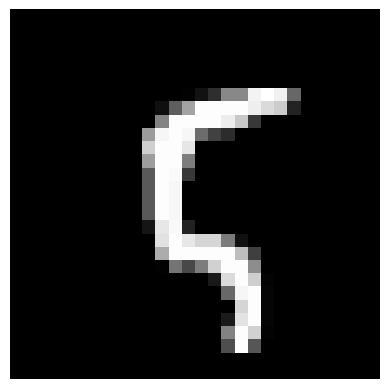

In [5]:
image = X[100].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## 2. Split the data and Run the model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#X_train, X_test = X_train.T, X_test.T
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (56000, 784), (56000, 10)
Test shape: (14000, 784), (14000, 10)


In [9]:
from NeuralNetwork import NeuralNetwork
nn = NeuralNetwork()
nn.add_layer(input_size=784, num_neurons=256, activation="relu")
nn.add_layer(num_neurons=128, activation="relu")
nn.add_layer(num_neurons=64, activation="relu")
nn.add_layer(num_neurons=10, activation="softmax")

nn.train(X=X_train, y=y_train, epochs=50, learning_rate=0.0001)

ValueError: shapes (56000,784) and (256,784) not aligned: 784 (dim 1) != 256 (dim 0)